### **Decision Tree Classification in Loan Data**

In [27]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [28]:
# read and print dataset
import pandas

df = pandas.read_csv('./loan.csv')

df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [29]:
# Decision tree, бүх дата тоо байх шаардлагатай
# String датануудыг бүгдийг numerical болгон хөрвүүлэх шаардлагатай

column1 = {'Male': 0, 'Female': 1}
column2 = {'Married': 0, 'Single': 1}
column3 = {'Denied': 0, 'Approved': 1}

df['gender'] = df['gender'].map(column1)
df['marital_status'] = df['marital_status'].map(column2)
df['loan_status'] = df['loan_status'].map(column3)

df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,0,Engineer,Bachelor's,0,85000,720,1
1,45,1,Teacher,Master's,1,62000,680,1
2,28,0,Student,High School,1,25000,590,0
3,51,1,Manager,Bachelor's,0,105000,780,1
4,36,0,Accountant,Bachelor's,0,75000,710,1


In [30]:
# education_level, occupation-ны хувьд гараар ангилж өгөхөд хэтэрхий их unique дататай учир LabelEncoder ашиглана
class LabelEncoder:
  def __init__(self):
    self.classes_ = {} # class to index
    self.inverse_classes_ = {} # index to class

  def fit(self, data):
    # Оролтын өгөгдлийн unique датануудыг sort хийж авна
    unique_classes = sorted(set(data))

    #
    self.classes_ = {cls: idx for idx, cls in enumerate(unique_classes)}

    #
    self.inverse_classes_ = {idx: cls for cls, idx in self.classes_.items()}

    return self

  def transform(self, data):
    #
    return [self.classes_[item] for item in data]

  def fit_transform(self, data):
    #
    self.fit(data)
    return self.transform(data)

  def inverse_transform(self, data):
    #
    return [self.inverse_classes_[item] for item in data]


In [31]:
# occupation болон education_level column дотор хэдэн төрлийн элемент байгааг харья
df['education_level'].value_counts()

education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64

In [32]:
df['occupation'].value_counts()

occupation
Engineer        5
Analyst         2
Chef            2
Writer          2
Banker          2
Receptionist    2
Teacher         2
Professor       2
Designer        2
Marketing       2
Salesman        2
Architect       2
Consultant      2
Doctor          2
IT              2
Artist          2
Lawyer          2
Nurse           2
Accountant      2
Manager         2
Photographer    1
Server          1
Psychologist    1
Software        1
Musician        1
Dentist         1
Programmer      1
Editor          1
Pilot           1
Realtor         1
Electrician     1
HR              1
Sales           1
Veterinarian    1
Researcher      1
Pharmacist      1
Student         1
Stylist         1
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

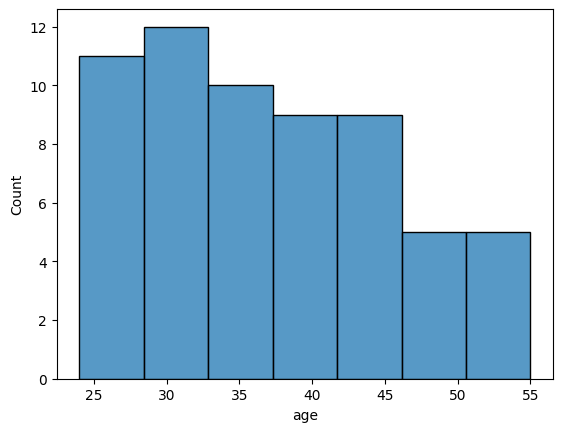

In [33]:
# зарим нэг датагаа графикаар харья
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = df,x = 'age')

<Axes: ylabel='count'>

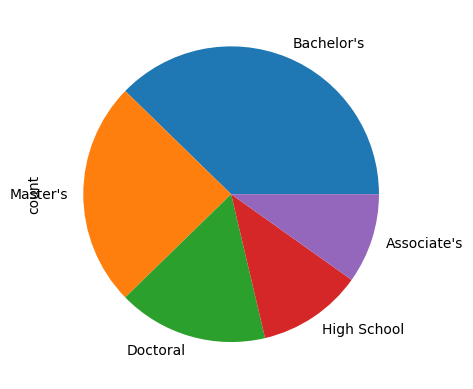

In [34]:
df['education_level'].value_counts().plot(kind = 'pie')

In [35]:
# олонлогийн хазайлтыг олно
def sum_of_data(data):
  sum = 0
  for value in data:
    sum += value
  return sum

def mean_of_data(data):
  """
  Parameters:
  data ( list or numpy array) --> байна
  """
  if not data:
      raise ValueError("Дунджийг олоход багадаа 1-аас дээш тооны олонлог шаардлагатай")

  # Бүх элементийг нийлбэрийг олно
  total_sum = sum_of_data(data)
  # Тухайн датаны хэмжээ
  n = len(data)
  # Дунджийг олно
  mean_value = total_sum / n

  return mean_value

def skewness(data):
  """
  Parameters:
  data ( list or numpy array) --> байна
  """

  n = len(data)
  if n < 3:
    raise ValueError("Хазайлтыг олоход багадаа 3-аас дээш тооны олонлог шаардлагатай")

  mean = mean_of_data(data)

  # Стандарт хазайлт
  std_dev = np.std(data, ddof=1)

  # Хазайлтыг тодорхойлно
  skewness = (n / ((n-1) * (n-2)) * sum_of_data(((data-mean) / std_dev) ** 3))

  return skewness